In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


In [ ]:
X_train[4].shape

(28, 28)

In [ ]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

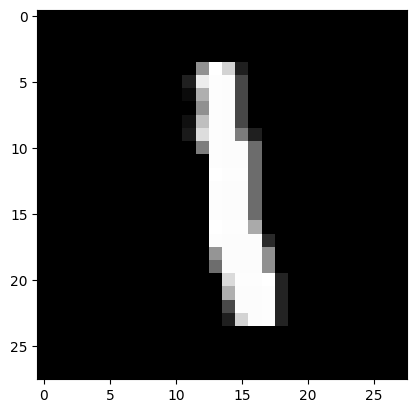

In [ ]:
plt.imshow(X_train[6], cmap='gray')

In [ ]:
y_train[6]

1

In [ ]:
print(X_train.max())
print(X_train.min())

255
0


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
model = keras.Sequential(
        [keras.layers.Dense(10, input_shape=(784, ),
        activation='softmax')])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_flattened, y_train, epochs =15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4693 - accuracy: 0.8773
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9142
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2736 - accuracy: 0.9236
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9269
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9275
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9277
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9292
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2532 - accuracy: 0.9297
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2677 - accuracy: 0.9272


[0.26767727732658386, 0.9272000193595886]

In [ ]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.0549500e-07, 3.2163028e-13, 1.0303249e-06, 2.7335011e-03,
       9.4522541e-08, 2.4904257e-05, 3.0121156e-13, 9.9703616e-01,
       9.3764793e-06, 1.9476074e-04], dtype=float32)

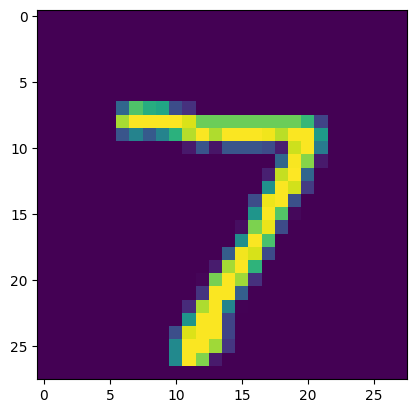

In [ ]:
plt.imshow(X_test[0])

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
preds = model.predict(X_test_flattened)
pred_classes = preds.argmax(axis = 1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_test[0]

7

In [ ]:
pred_classes[0]

7

In [ ]:
y_test[50:80]

array([6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
       2, 9, 1, 7, 3, 2, 9, 7], dtype=uint8)

In [ ]:
pred_classes[50:80]

array([6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0,
       2, 9, 1, 7, 3, 2, 9, 7])

In [ ]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.89      0.93      0.91      1032
           3       0.93      0.90      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.90      0.88      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions = pred_classes)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    3,    2,    0,    7,    8,    3,    1,    0],
       [   0, 1118,    6,    0,    0,    1,    3,    2,    5,    0],
       [   3,    8,  958,    8,    8,    4,   10,    9,   20,    4],
       [   1,    0,   34,  904,    0,   27,    2,   10,   24,    8],
       [   1,    1,   11,    1,  904,    0,    9,    4,   10,   41],
       [   7,    2,    5,   29,    6,  788,   13,    7,   30,    5],
       [  10,    3,   15,    1,    7,   13,  907,    1,    1,    0],
       [   1,    6,   28,    3,    4,    1,    0,  948,    3,   34],
       [   6,   14,   12,   14,    8,   27,    9,   10,  864,   10],
       [   8,    8,    2,    7,   20,    6,    0,   24,    9,  925]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Values')

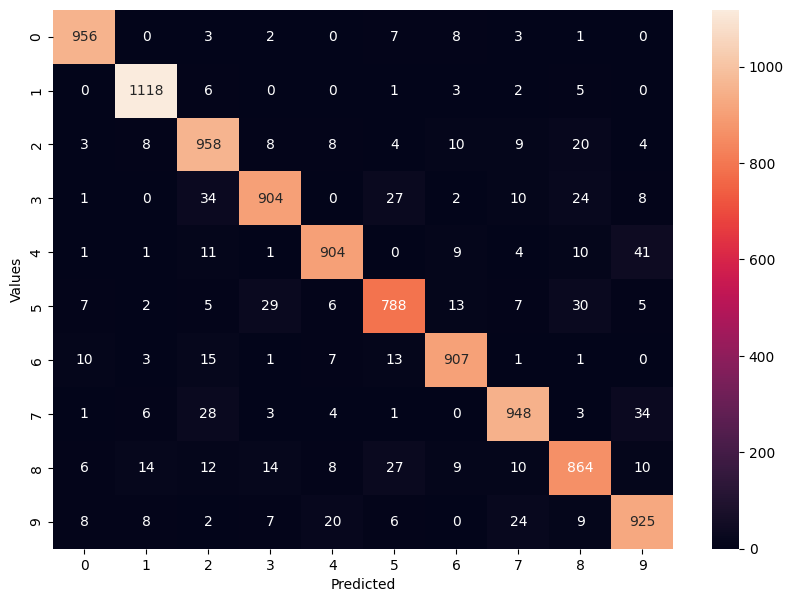

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Values')

In [ ]:
model = keras.Sequential([
        keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_flattened, y_train, epochs =15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9248
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1215 - accuracy: 0.9642
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0861 - accuracy: 0.9742
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0648 - accuracy: 0.9798
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9915
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0472 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019